In [1]:
import pandas as pd

timestamp_df = pd.read_csv('transactions_train.csv')

In [2]:
timestamp_column = 't_dat'
timestamp_df[timestamp_column] = pd.to_datetime(timestamp_df[timestamp_column], format='%Y-%m-%d')

# Time intervals
timestamp_1 = "2020-09-14"
timestamp_2 = "2020-09-22"
t1 = timestamp_df[timestamp_column].searchsorted(timestamp_1)
t2 = timestamp_df[timestamp_column].searchsorted(timestamp_2)

cutout = timestamp_df.iloc[t1:t2 - 1]
timestamp_wo_sales = timestamp_df.drop(timestamp_df.index[t1:t2-1], inplace=False)

timestamp_1 = "2020-09-01"
timestamp_2 = "2020-09-22"
t1 = timestamp_df[timestamp_column].searchsorted(timestamp_1)
t2 = timestamp_df[timestamp_column].searchsorted(timestamp_2)
cutout_whole_sept = timestamp_df.iloc[t1:t2-1]
cutout

,t_dat,customer_id,article_id,price,sales_channel_id
31492019,2020-09-14,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,719530003,0.033881,2
31492020,2020-09-14,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,448509014,0.042356,2
31492021,2020-09-14,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,734592001,0.030492,1
31492022,2020-09-14,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,889036004,0.050831,2
31492023,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,0.035576,2
...,...,...,...,...,...
31755452,2020-09-21,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,782555003,0.025407,2
31755453,2020-09-21,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,673677024,0.025407,2
31755454,2020-09-21,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,673677024,0.025407,2
31755455,2020-09-21,fff6bd1afa9c1e0821ec1d146559d42a2d58364c1d2db1...,924243001,0.042356,1


In [3]:
# For each item retrieve mean price in September
mean_sept = cutout_whole_sept.groupby('article_id').mean()
mean_sept

,price,sales_channel_id
article_id,,
108775044,0.008458,2.000000
110065011,0.011847,1.000000
111565001,0.006197,1.766667
111586001,0.012272,1.000000
111593001,0.012172,1.228000
...,...,...
952267001,0.015027,1.394737
952938001,0.046593,2.000000
953450001,0.016831,2.000000


In [4]:
# For each item retrieve mean in sales week
mean_salesW = cutout.groupby('article_id').mean()
# Actually this information is quite interesting for the salses channel since it shows how much an item 
# was bought online/physically (2 = OFFLINE and 1 = ONLINE)
mean_salesW

,price,sales_channel_id
article_id,,
108775044,0.008458,2.000000
111565001,0.006580,1.833333
111586001,0.012821,1.000000
111593001,0.011684,1.200000
111609001,0.008592,1.333333
...,...,...
952267001,0.014096,1.636364
952938001,0.046593,2.000000
953450001,0.016932,2.000000


In [5]:
# Keep average prices only for items sold in sales week
result = mean_salesW.join(mean_sept, how="inner", lsuffix='_sales', rsuffix='_avg')
# negative shift in sales_channel = MOVE TO ONLINE, + shift = MOVE TO OFFLINE
result

,price_sales,sales_channel_id_sales,price_avg,sales_channel_id_avg
article_id,,,,
108775044,0.008458,2.000000,0.008458,2.000000
111565001,0.006580,1.833333,0.006197,1.766667
111586001,0.012821,1.000000,0.012272,1.000000
111593001,0.011684,1.200000,0.012172,1.228000
111609001,0.008592,1.333333,0.008927,1.456140
...,...,...,...,...
952267001,0.014096,1.636364,0.015027,1.394737
952938001,0.046593,2.000000,0.046593,2.000000
953450001,0.016932,2.000000,0.016831,2.000000


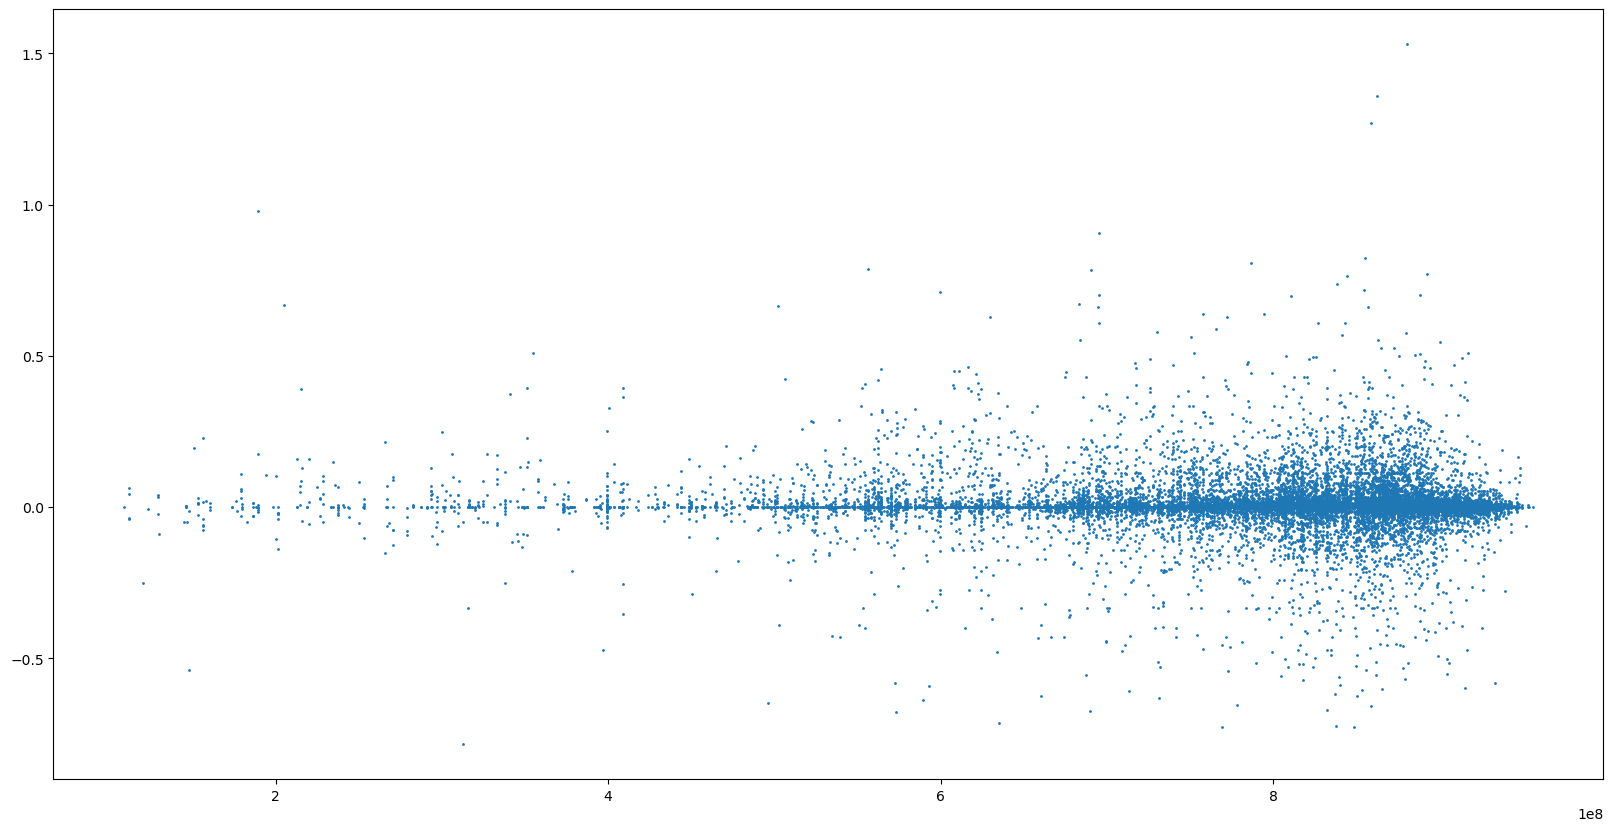

In [6]:
# See how much prices change
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(result.index, (result['price_sales']-result['price_avg'])/result['price_avg'], s=1)
plt.show()

In [7]:
#Nice facts about this plot
graph_scatter = (result['price_sales']-result['price_avg'])/result['price_avg']
print("Mean discount percentage: {:2.3}%".format(graph_scatter.mean()*100))
print("Max discount percentage: {:2.3}%".format(graph_scatter.min()*100))
print("Max increase in price compared to avg: {:3.4}%".format(graph_scatter.max()*100))

Mean discount percentage: 0.765%
Max discount percentage: -78.4%
Max increase in price compared to avg: 153.1%


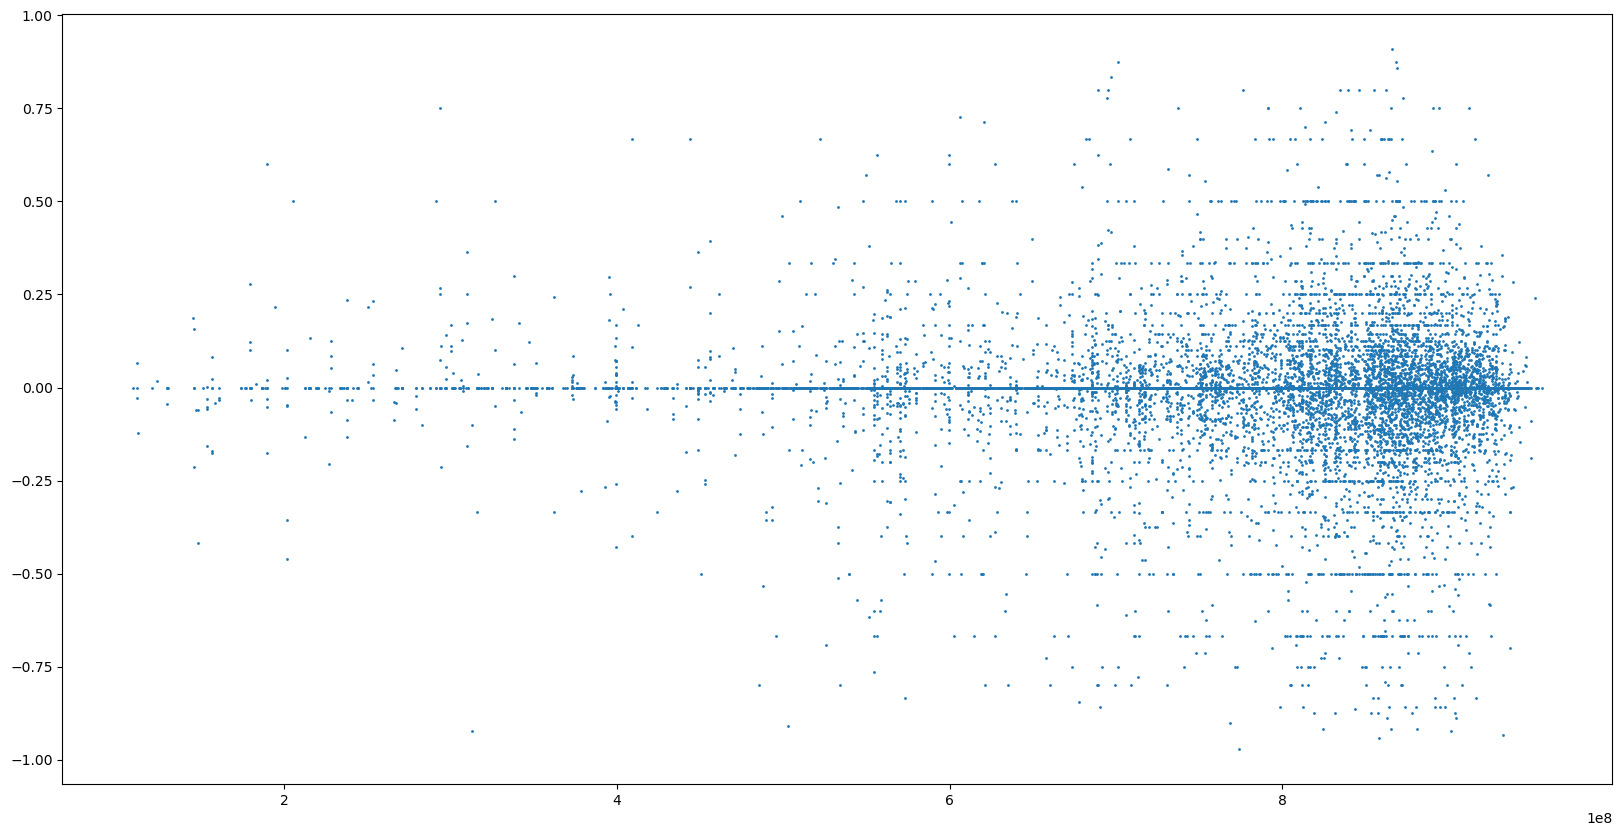

In [8]:
# How did the channel change during discount?
# negative shift in sales_channel = MOVE TO ONLINE, + shift = MOVE TO OFFLINE
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(result.index, result['sales_channel_id_sales'] - result['sales_channel_id_avg'], s=1)
plt.show()

In [9]:
# Basic facts about the plot
graph_scatter = result['sales_channel_id_sales'] - result['sales_channel_id_avg']
print("Mean shift: {:2.3}".format(graph_scatter.mean()))
print("Min shift: {:3.4}".format(graph_scatter.min()))
print("Max shift: {:3.4}".format(graph_scatter.max()))

Mean shift: -0.00786
Min shift: -0.9714
Max shift: 0.9091


In [10]:
# A deeper look into the 28th which is an outlier
# Time intervals
timestamp_1 = "2020-09-21"
timestamp_2 = "2020-09-22"
t1 = cutout[timestamp_column].searchsorted(timestamp_1)
t2 = cutout[timestamp_column].searchsorted(timestamp_2)

peak_day_df = cutout.iloc[t1:t2 - 1]
cutout_no_peak = cutout.drop(cutout.index[t1:t2-1], inplace=False)

# 
mean_peak_day = peak_day_df.groupby('article_id').mean()
mean_rest_of_week = cutout_no_peak.groupby('article_id').mean()

# Keep average prices only for items sold in sales week
result = mean_peak_day.join(mean_rest_of_week, how="inner", lsuffix='_peak', rsuffix='_avg')
result

,price_peak,sales_channel_id_peak,price_avg,sales_channel_id_avg
article_id,,,,
111565001,0.005139,1.444444,0.006973,1.939394
111586001,0.013169,1.000000,0.012798,1.000000
111593001,0.016678,1.000000,0.011556,1.205128
111609001,0.007619,1.000000,0.008786,1.400000
123173001,0.012874,2.000000,0.011840,1.594203
...,...,...,...,...
949551001,0.033881,1.500000,0.033192,1.444444
949551002,0.027102,1.000000,0.033051,1.388889
953450001,0.016932,2.000000,0.016932,2.000000


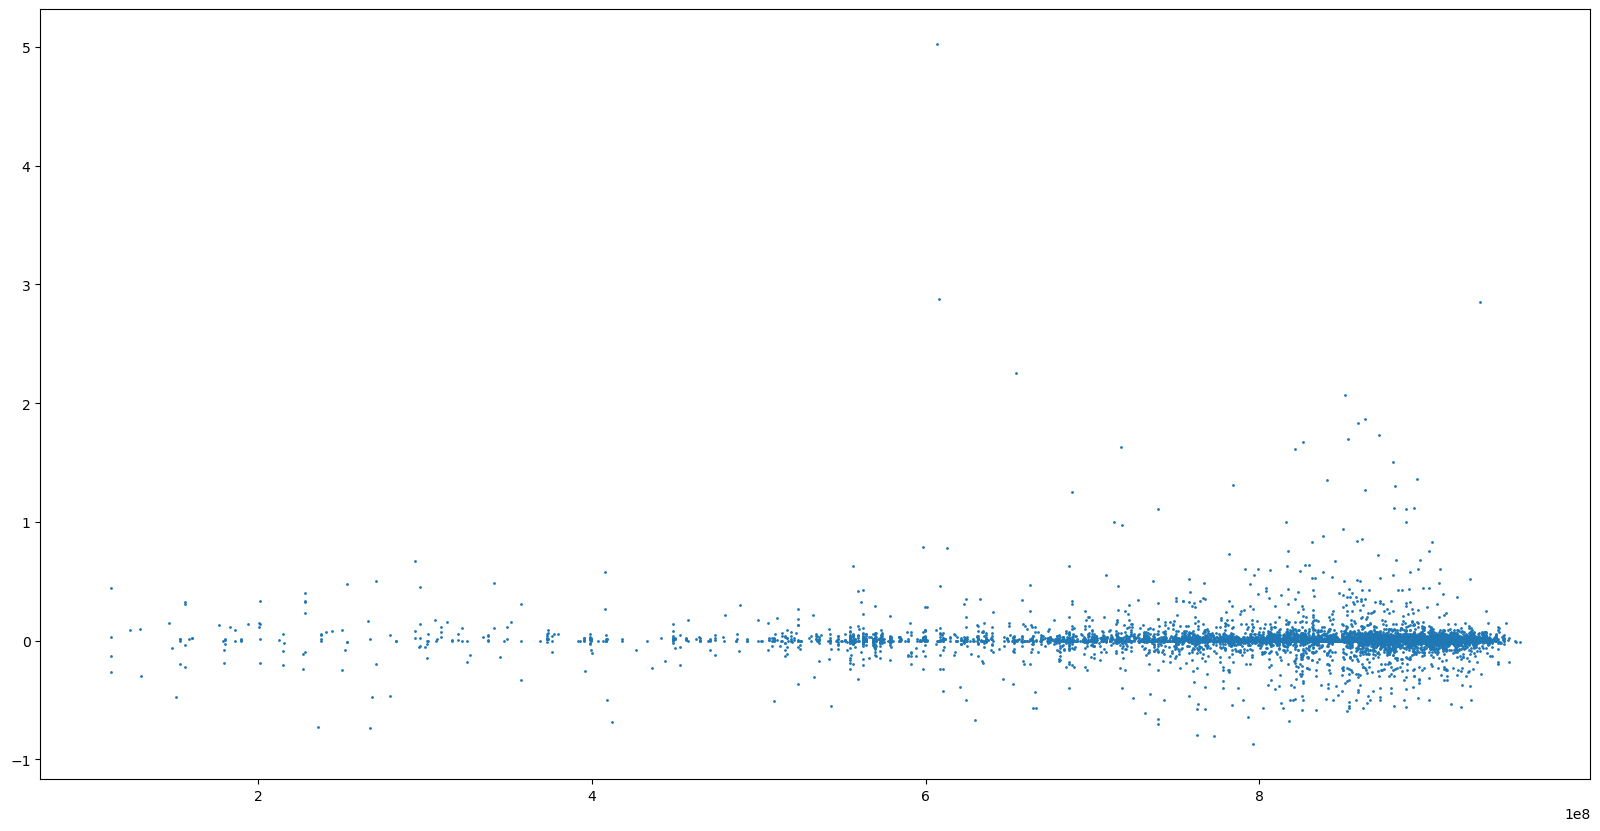

In [11]:
# Difference between the week and 28th September
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(result.index, (result['price_peak']-result['price_avg'])/result['price_avg'], s=1)
plt.show()

In [12]:
# Basic facts about the plot
graph_scatter = (result['price_peak'] - result['price_avg']) / result['price_avg']
print("Mean shift: {:3.4}%".format(graph_scatter.mean()*100))
print("Min shift: {:3.4}%".format(graph_scatter.min()*100))
print("Max shift: {:3.4}%".format(graph_scatter.max()*100))
print("Median: {}".format(graph_scatter.median()))
print("Std dev: {}".format(graph_scatter.std()))


Mean shift: 1.051%
Min shift: -87.26%
Max shift: 502.5%
Median: 0.004159005473651403
Std dev: 0.15748477316853596


Clearly this day is different from the rest of the week, in terms of prices 

In [13]:
# How big is the volume of the 28th compared to the rest of the week?
print("The 22th is {:3.4}% of the whole week transactions".format(peak_day_df.shape[0]/cutout.shape[0]*100))

The 22th is 12.2% of the whole week transactions


In [14]:
# When where items sold during sales sold during the rest of the year?
modified_df = timestamp_df.drop('sales_channel_id',axis=1, inplace=False)
modified_df.drop('customer_id',axis=1,inplace=True)
modified_df.drop('price', axis=1, inplace=True)
modified_peak_df = peak_day_df.drop(['price', 'sales_channel_id', 't_dat', 'customer_id'], axis=1, inplace=False)
modified_peak_df = modified_peak_df.groupby('article_id').count()
modified_peak_df

""
article_id
111565001
111586001
111593001
111609001
123173001
...
949551002
949594001
953450001


In [15]:
result_join = modified_peak_df.join(modified_df.set_index('article_id'), how='inner', lsuffix='_o', rsuffix='_p')
result_join

,t_dat
article_id,
111565001,2018-09-20
111565001,2018-09-20
111565001,2018-09-20
111565001,2018-09-20
111565001,2018-09-20
...,...
956217002,2020-09-18
956217002,2020-09-20
956217002,2020-09-21


In [16]:
graph = result_join.groupby("t_dat")["t_dat"].count()
graph

t_dat
2018-09-20     3299
2018-09-21     3243
2018-09-22     1368
2018-09-23     3789
2018-09-24     2895
              ...  
2020-09-18    33312
2020-09-19    31132
2020-09-20    27431
2020-09-21    32130
2020-09-22    28636
Name: t_dat, Length: 734, dtype: int64

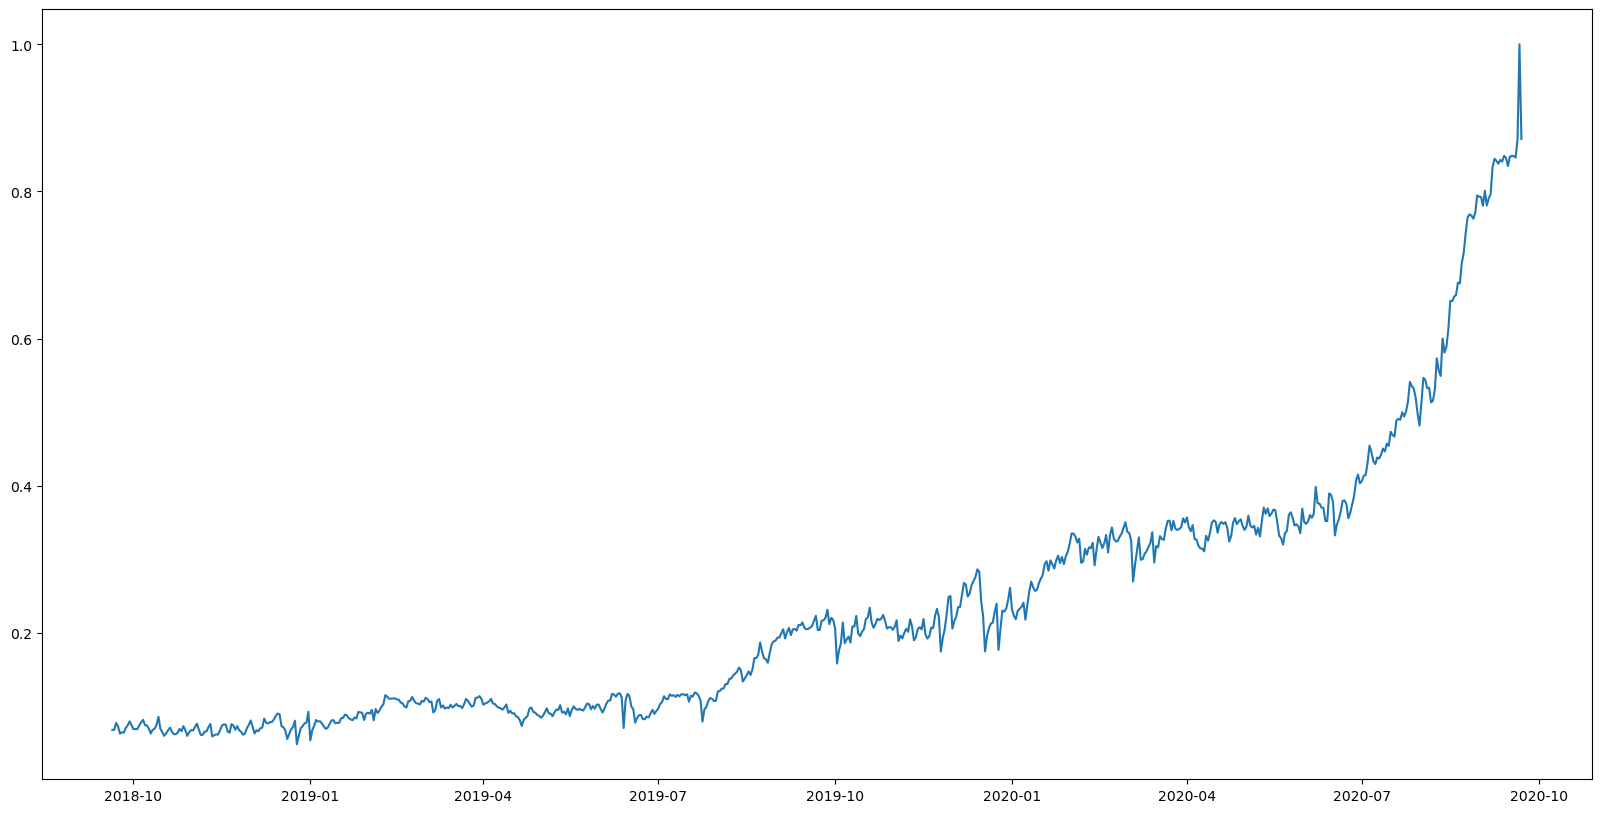

Statistics: average 9720.42, max 54035, min 718


In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(graph.index, graph / graph_total)
#ax.axhline(y=graph.mean(), color='r', linestyle='-.', alpha=0.6)
plt.show()
print("Statistics: average {:5.6}, max {}, min {}".format(graph.mean(), graph.max(), graph.min()))

The items bought on the sales of 28th September are actually bought in a quantity which is greater than the average from April to November of 2019. What about the entire week?

In [ ]:
# When where items sold during sales sold during the rest of the year?
modified_df = timestamp_df.drop('sales_channel_id',axis=1, inplace=False)
modified_df.drop('customer_id',axis=1,inplace=True)
modified_df.drop('price', axis=1, inplace=True)
modified_week_df = cutout_no_peak.drop(['price', 'sales_channel_id', 't_dat', 'customer_id'], axis=1, inplace=False)
modified_week_df = modified_week_df.groupby('article_id').count()
modified_week_df

In [ ]:
result_join = modified_week_df.join(modified_df.set_index('article_id'), how='inner', lsuffix='_o', rsuffix='_p')
result_join

In [20]:
graph_week = result_join.groupby("t_dat")["t_dat"].count()
graph_week

t_dat
2018-09-20     3299
2018-09-21     3243
2018-09-22     1368
2018-09-23     3789
2018-09-24     2895
              ...  
2020-09-18    33312
2020-09-19    31132
2020-09-20    27431
2020-09-21    32130
2020-09-22    28636
Name: t_dat, Length: 734, dtype: int64

In [32]:
graph_sept = result_join.groupby("t_dat")["t_dat"].count()
graph_total = timestamp_df.groupby("t_dat")["t_dat"].count()
graph_total

t_dat
2018-09-20    48399
2018-09-21    47543
2018-09-22    17635
2018-09-23    52230
2018-09-24    45984
              ...  
2020-09-18    39284
2020-09-19    36796
2020-09-20    31489
2020-09-21    32130
2020-09-22    32866
Name: t_dat, Length: 734, dtype: int64

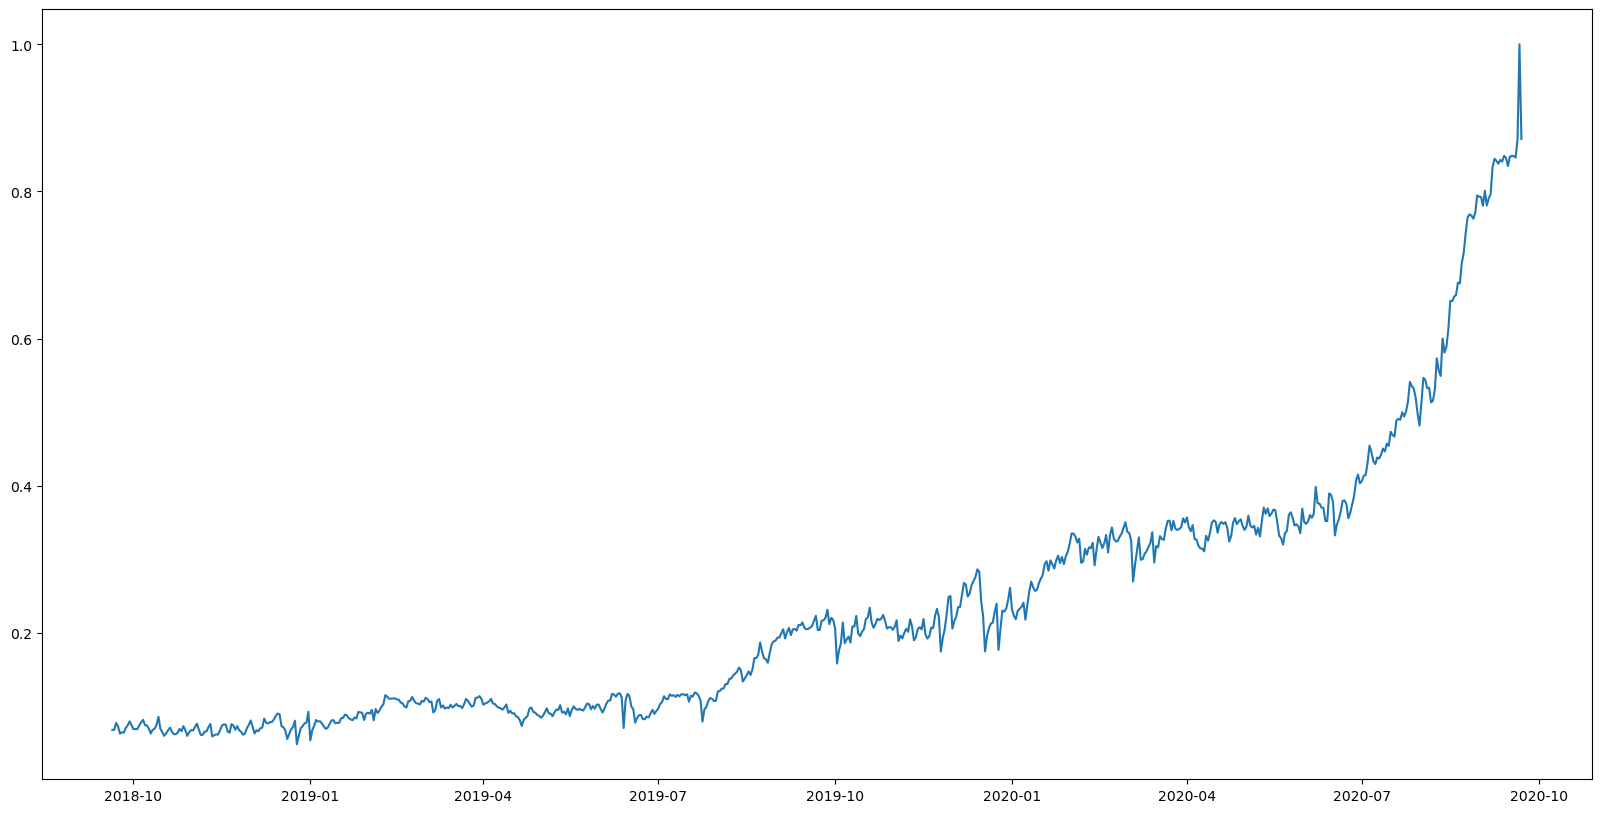

Statistics: average 9720.42, max 54035, min 718


In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(graph_week.index, graph_week / graph_total)
#ax.plot(graph.index, graph)
#ax.axhline(y=graph_week.mean(), color='r', linestyle='-.', alpha=0.6)
plt.show()
print("Statistics: average {:5.6}, max {}, min {}".format(graph_week.mean(), graph_week.max(), graph_week.min()))

The two graphs contain basically the same information, the same set of articles is sold during the 28th and the rest of the week.
It would be interesting to look into the ICM and see which type of items are sold during sales (in terms of features) and show which are the most recurring keywords

TODO: Check if September 2020 is similar to rest of year

In [23]:
timestamp_1 = "2020-09-01"
timestamp_2 = "2020-09-22"
t1 = timestamp_df[timestamp_column].searchsorted(timestamp_1)
t2 = timestamp_df[timestamp_column].searchsorted(timestamp_2)
modified_september = timestamp_df.iloc[t1:t2-1]
modified_september.drop(['price', 'sales_channel_id', 't_dat', 'customer_id'], axis=1, inplace=True)
modified_september = modified_september.groupby("article_id").count()
modified_september

C:\Users\User\AppData\Local\Temp\ipykernel_14580\3691942780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_september.drop(['price', 'sales_channel_id', 't_dat', 'customer_id'], axis=1, inplace=True)


""
article_id
108775044
110065011
111565001
111586001
111593001
...
952267001
952938001
953450001


In [24]:
result_join = modified_september.join(modified_df.set_index('article_id'), how='inner', lsuffix='_o', rsuffix='_p')
result_join

,t_dat
article_id,
108775044,2018-09-20
108775044,2018-09-20
108775044,2018-09-20
108775044,2018-09-20
108775044,2018-09-20
...,...
956217002,2020-09-18
956217002,2020-09-20
956217002,2020-09-21


In [25]:
graph_sept = result_join.groupby("t_dat")["t_dat"].count()
graph_total = timestamp_df.groupby("t_dat")["t_dat"].count()
graph_total

t_dat
2018-09-20    48399
2018-09-21    47543
2018-09-22    17635
2018-09-23    52230
2018-09-24    45984
              ...  
2020-09-18    39284
2020-09-19    36796
2020-09-20    31489
2020-09-21    32130
2020-09-22    32866
Name: t_dat, Length: 734, dtype: int64

In [29]:
graph_sept

t_dat
2018-09-20     7330
2018-09-21     7206
2018-09-22     2959
2018-09-23     8564
2018-09-24     6865
              ...  
2020-09-18    39284
2020-09-19    36796
2020-09-20    31489
2020-09-21    32130
2020-09-22    32494
Name: t_dat, Length: 734, dtype: int64

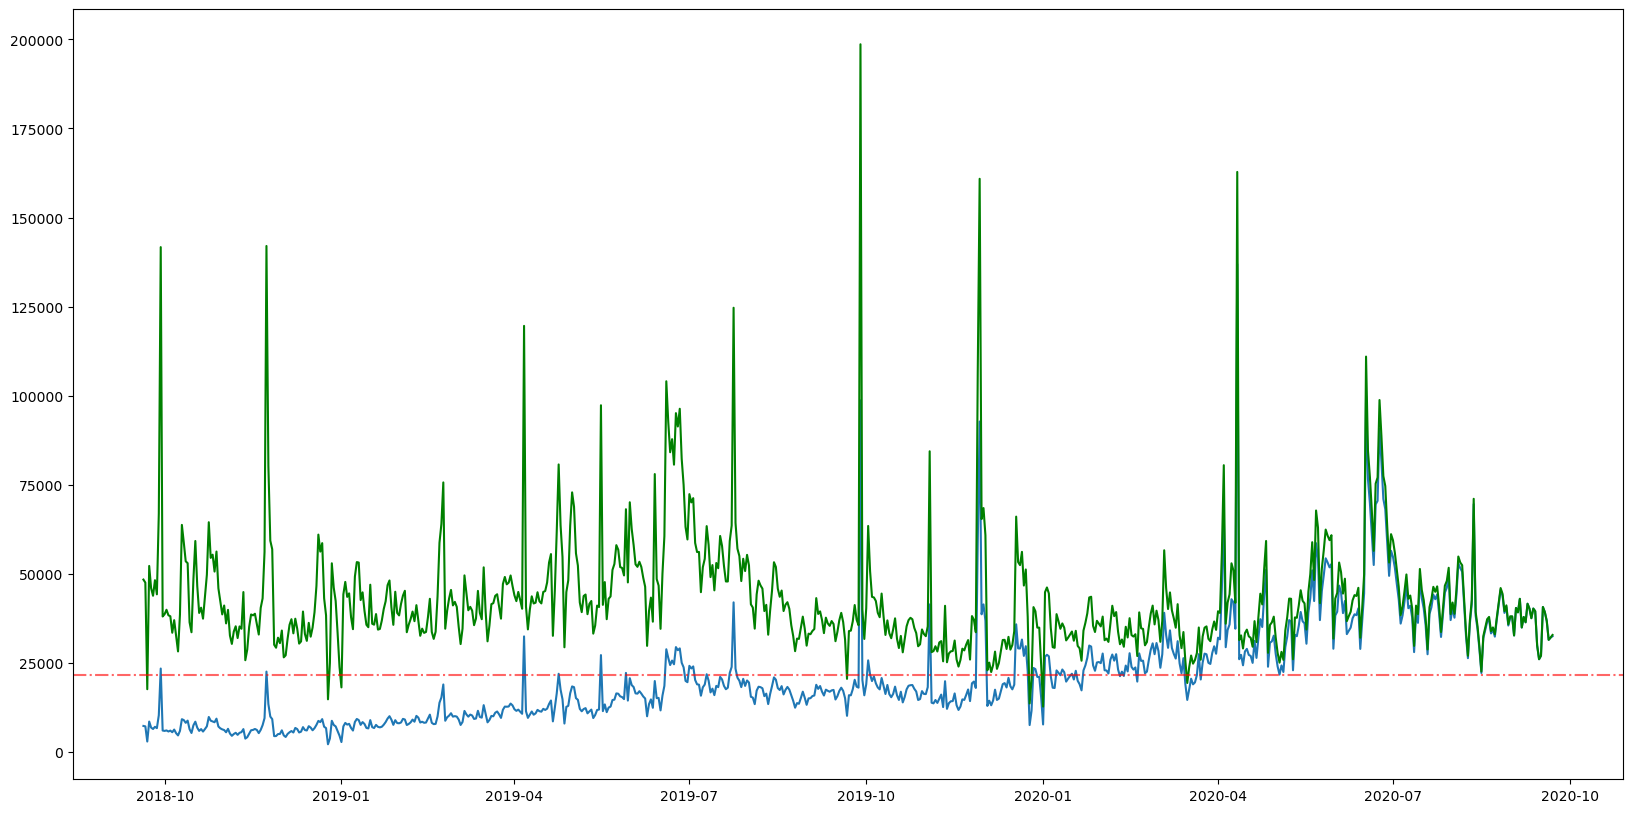

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
graph_percentage = graph_sept / graph_total
ax.plot(graph_sept.index, graph_sept)
ax.plot(graph_total.index, graph_total, color='g')
ax.axhline(y=graph_sept.mean(), color='r', linestyle='-.', alpha=0.6)
plt.show()

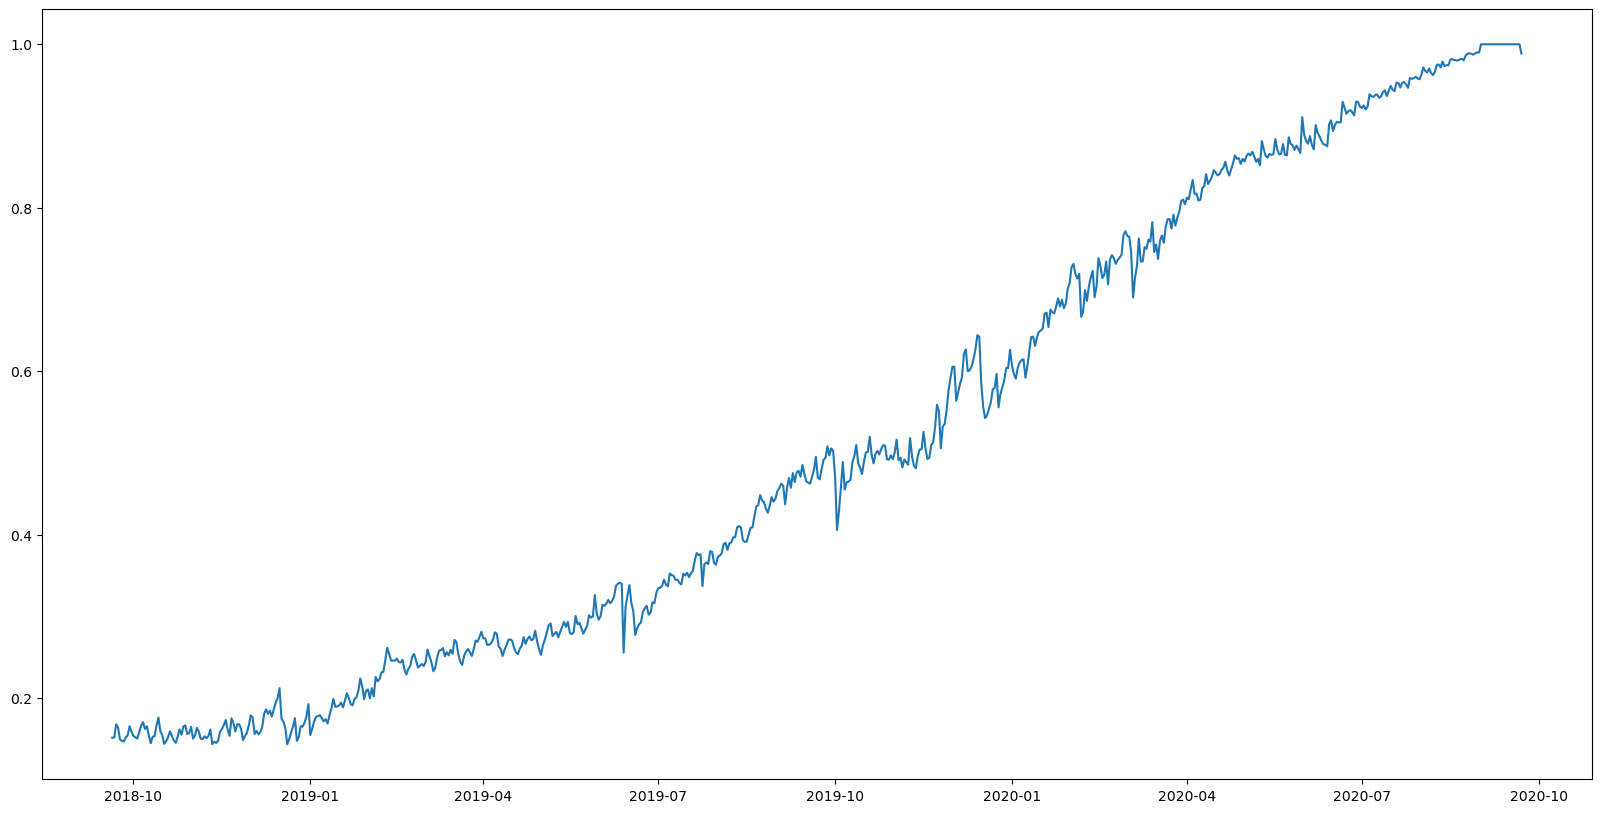

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(graph_sept.index, graph_percentage)
plt.show()